**HEART DISEASE PREDICTION**

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

![](http://)The goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD)

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

**Exploratory Data Analysis**

In [4]:
#Reading data
data = pd.read_csv("../input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


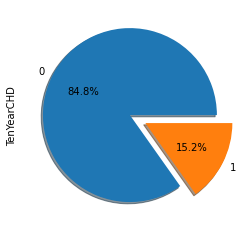

In [5]:
#Pie chart of data
data['TenYearCHD'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

Seems that 15.2% of people have 10-year risk of future coronary heart disease. This also tells that the data is skewed which we will handle later.

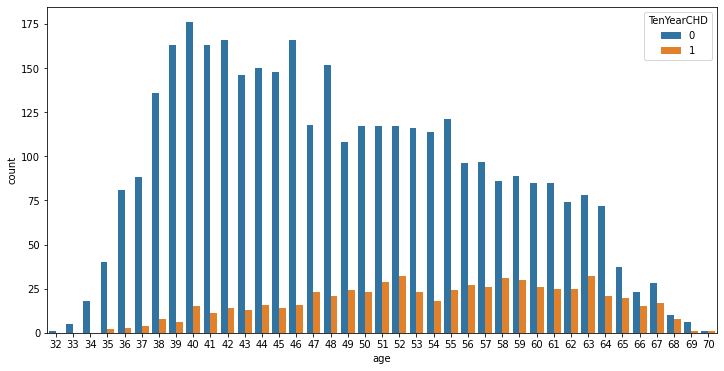

In [6]:
#Plotting histogram of age with respect to TenYearCHD
plt.figure(figsize=(12, 6))
sns.countplot('age',hue='TenYearCHD',data=data)

**Insight** : There seems to be increased risk with age

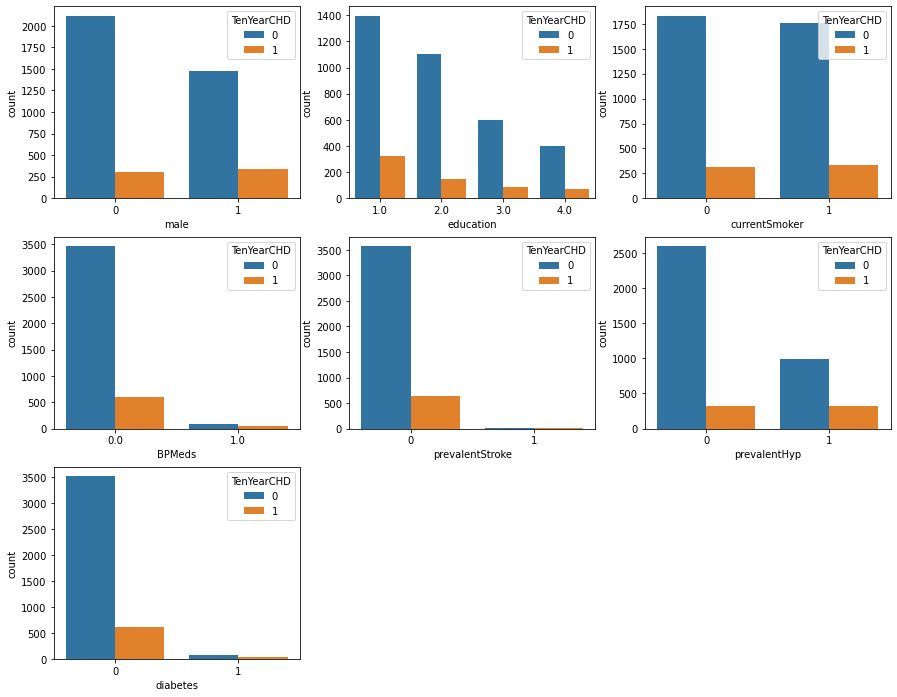

In [7]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot('male',hue='TenYearCHD',data=data)
plt.subplot(3,3,2)
sns.countplot('education',hue='TenYearCHD',data=data)
plt.subplot(3,3,3)
sns.countplot('currentSmoker',hue='TenYearCHD',data=data)
plt.subplot(3,3,4)
sns.countplot('BPMeds',hue='TenYearCHD',data=data)
plt.subplot(3,3,5)
sns.countplot('prevalentStroke',hue='TenYearCHD',data=data)
plt.subplot(3,3,6)
sns.countplot('prevalentHyp',hue='TenYearCHD',data=data)
plt.subplot(3,3,7)
sns.countplot('diabetes',hue='TenYearCHD',data=data)

plt.show()

**Insight**: 
1. There seems to be a slighlty higher risk if its a male.
2. The more educated people are the lower their risk. Makes sense as they have more knowledge on how to take care of themselves.
3. Risk is the same for both smoker and non-smoker
4. People taking BPMeds have a higher risk.
5. People that have had a stroke are at greater risk.
6. People who are hypertensive are at greater risk.
7. People with diabetes are at a higher risk

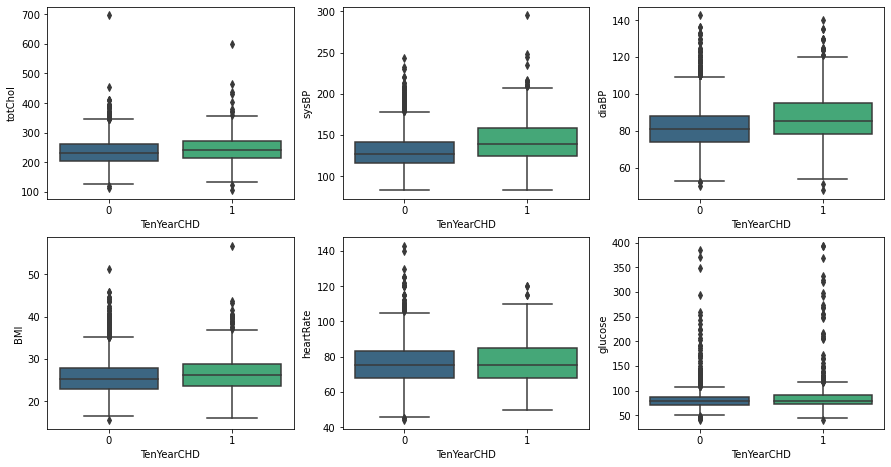

In [8]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.boxplot(data['TenYearCHD'], data['totChol'], palette = 'viridis')
plt.subplot(3,3,2)
sns.boxplot(data['TenYearCHD'], data['sysBP'], palette = 'viridis')
plt.subplot(3,3,3)
sns.boxplot(data['TenYearCHD'], data['diaBP'], palette = 'viridis')
plt.subplot(3,3,4)
sns.boxplot(data['TenYearCHD'], data['BMI'], palette = 'viridis')
plt.subplot(3,3,5)
sns.boxplot(data['TenYearCHD'], data['heartRate'], palette = 'viridis')
plt.subplot(3,3,6)
sns.boxplot(data['TenYearCHD'], data['glucose'], palette = 'viridis')

plt.show()

**Insight**: 
1. People with risk of CHD seem to have slighlty elevated cholestrol levels
2. People with risk of CHD seem to have elevated levels of systolic blood pressure (sysBP)
3. People with risk of CHD seem to have elevated levels of diastolic blood pressure (diaBP)
4. People with risk of CHD seem to have slighlty elevated BMI
5. People with risk of CHD seem to have slighlty elevated heart rate
6. People with risk of CHD seem to have slighlty elevated glucose levels

In [9]:
#Checking if data is missing
data.info()
print("------------------------")
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
-------------

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

There seems to be data missing

In [10]:
#Calculating the Missing Values % contribution in data
data_null = data.isna().mean().round(4) * 100
data_null.sort_values(ascending=False).head()

glucose       9.16
education     2.48
BPMeds        1.25
totChol       1.18
cigsPerDay    0.68
dtype: float64

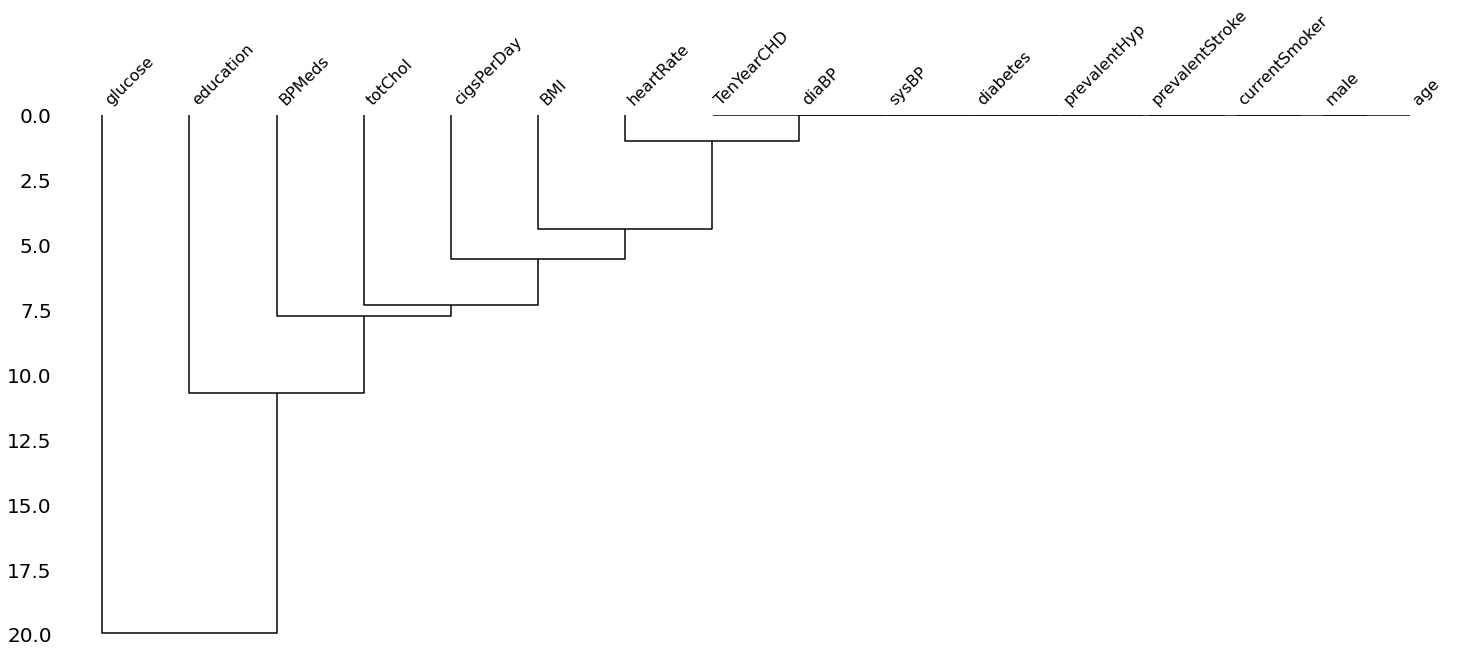

In [11]:
#A dendrogram is a diagram that shows the hierarchical relationship between features
#Here we are looking at dendogram of missing data
import missingno as msno
msno.dendrogram(data)

Handling missing data

In [13]:
#Imputing the missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data_new = pd.DataFrame(imputer.fit_transform(data))
data_new.columns = data.columns
data_new.index = data.index

In [14]:
data_new.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now lets check for outliers

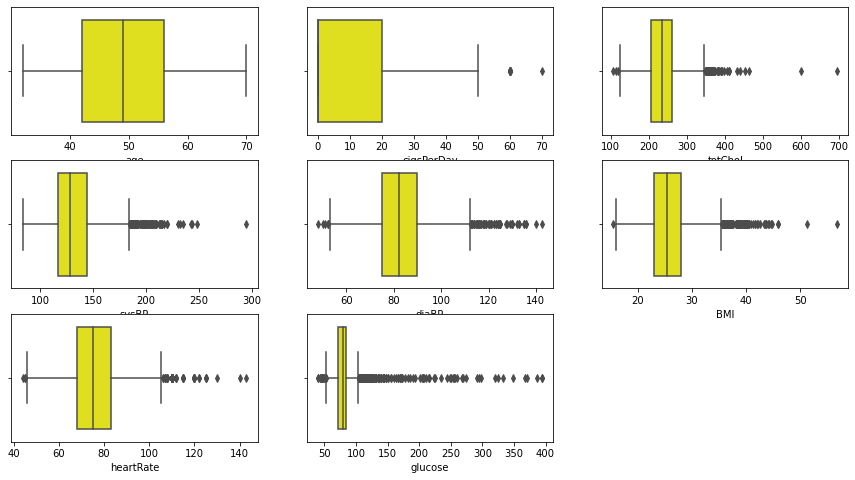

In [15]:
#Plotting boxplot of features to find outliers
plt.figure(figsize=(15, 8))

plt.subplot(3,3,1)
sns.boxplot(data_new['age'],color='yellow')
plt.subplot(3,3,2)
sns.boxplot(data_new['cigsPerDay'],color='yellow')
plt.subplot(3,3,3)
sns.boxplot(data_new['totChol'],color='yellow')
plt.subplot(3,3,4)
sns.boxplot(data_new['sysBP'],color='yellow')
plt.subplot(3,3,5)
sns.boxplot(data_new['diaBP'],color='yellow')
plt.subplot(3,3,6)
sns.boxplot(data_new['BMI'],color='yellow')
plt.subplot(3,3,7)
sns.boxplot(data_new['heartRate'],color='yellow')
plt.subplot(3,3,8)
sns.boxplot(data_new['glucose'],color='yellow')

plt.show()

We will handle this using Z-score

In [16]:
"""
Z-score:
This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
If the z score of a data point is more than 3/-3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
"""

from scipy import stats
z = np.abs(stats.zscore(data_new))
threshold = 3
print(np.where(z > 3)) # The first array contains the list of row numbers and second array respective column numbers

#Removing outliers
data_new = data_new[(z < 3).all(axis=1)]

(array([  13,   28,   35,   37,   37,   37,   42,   44,   44,   44,   44,
         56,   66,   66,   78,   87,   87,   96,  108,  114,  143,  153,
        154,  158,  158,  161,  165,  194,  247,  249,  249,  249,  249,
        255,  255,  260,  264,  284,  294,  299,  311,  327,  333,  333,
        339,  346,  357,  358,  369,  374,  407,  409,  409,  421,  423,
        433,  443,  443,  446,  446,  447,  451,  458,  467,  471,  471,
        475,  481,  481,  481,  531,  533,  541,  543,  585,  590,  590,
        617,  646,  660,  664,  665,  675,  699,  721,  723,  738,  750,
        750,  763,  763,  763,  786,  795,  829,  833,  833,  833,  833,
        864,  864,  864,  890,  894,  903,  903,  924,  932,  952,  952,
        965,  969,  976,  998, 1003, 1008, 1022, 1030, 1041, 1044, 1054,
       1068, 1068, 1078, 1079, 1079, 1110, 1111, 1111, 1123, 1150, 1165,
       1183, 1189, 1189, 1197, 1238, 1238, 1262, 1268, 1268, 1286, 1303,
       1333, 1340, 1360, 1363, 1363, 1377, 1389, 1

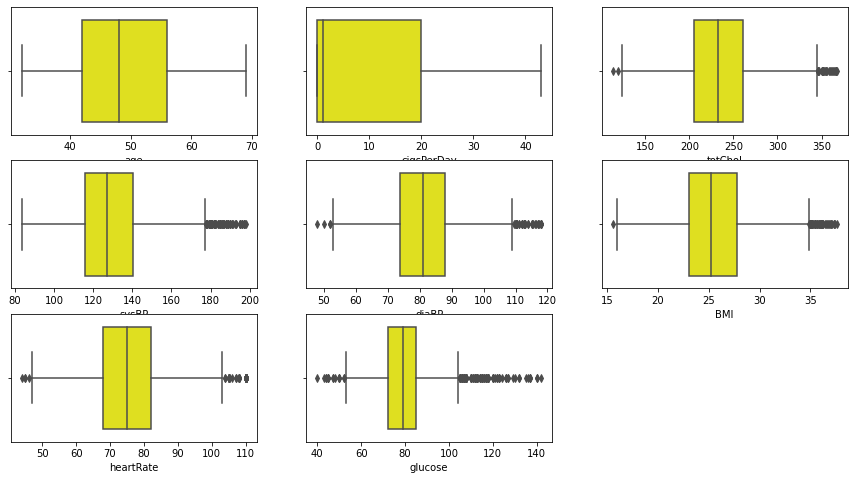

In [17]:
#Plotting boxplot of features to find outliers
plt.figure(figsize=(15, 8))

plt.subplot(3,3,1)
sns.boxplot(data_new['age'],color='yellow')
plt.subplot(3,3,2)
sns.boxplot(data_new['cigsPerDay'],color='yellow')
plt.subplot(3,3,3)
sns.boxplot(data_new['totChol'],color='yellow')
plt.subplot(3,3,4)
sns.boxplot(data_new['sysBP'],color='yellow')
plt.subplot(3,3,5)
sns.boxplot(data_new['diaBP'],color='yellow')
plt.subplot(3,3,6)
sns.boxplot(data_new['BMI'],color='yellow')
plt.subplot(3,3,7)
sns.boxplot(data_new['heartRate'],color='yellow')
plt.subplot(3,3,8)
sns.boxplot(data_new['glucose'],color='yellow')

plt.show()

In [18]:
#Looking at some of the properties such as mean and std of each feature
data_new.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.0,3845.000000,3845.0,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,0.434590,49.112614,1.999729,0.504031,9.042155,0.000347,0.0,0.266320,0.0,234.799082,129.755917,81.770611,25.478611,75.369019,79.594538,0.134200
std,0.495768,8.470710,1.009456,0.500049,11.549549,0.003187,0.0,0.442091,0.0,41.452461,19.080909,10.771745,3.596393,11.413421,12.132156,0.340912
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,205.000000,116.000000,74.000000,23.010000,68.000000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,233.000000,127.000000,81.000000,25.230000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,261.000000,140.500000,88.000000,27.760000,82.000000,85.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,43.000000,0.029630,0.0,1.000000,0.0,367.000000,198.000000,118.000000,37.580000,110.000000,142.000000,1.000000


Resampling data

Text(0.5, 1.0, 'Class Distributions')

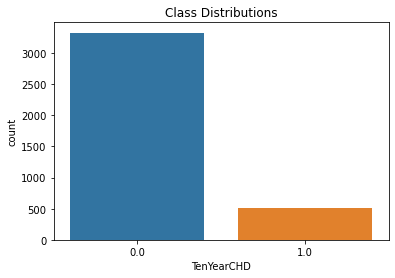

In [19]:
#Viewing class distribution
plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data=data_new)
plt.title('Class Distributions')

We can see that the data is imbalanced. This could lead to bad precision and recall. We will use SMOTE and RandomUndersample for resampling the data

Before that we will scale the follwing features:

age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate and glucose

In [20]:
#We will use Robust scaler for scaling as it is less prone to outliers
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

data_new['age'] = sc.fit_transform(data_new['age'].values.reshape(-1,1))
data_new['cigsPerDay'] = sc.fit_transform(data_new['cigsPerDay'].values.reshape(-1,1))
data_new['totChol'] = sc.fit_transform(data_new['totChol'].values.reshape(-1,1))
data_new['sysBP'] = sc.fit_transform(data_new['sysBP'].values.reshape(-1,1))
data_new['diaBP'] = sc.fit_transform(data_new['diaBP'].values.reshape(-1,1))
data_new['BMI'] = sc.fit_transform(data_new['BMI'].values.reshape(-1,1))
data_new['heartRate'] = sc.fit_transform(data_new['heartRate'].values.reshape(-1,1))
data_new['glucose'] = sc.fit_transform(data_new['glucose'].values.reshape(-1,1))

data_new.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,-0.642857,4.0,0.0,-0.05,0.0,0.0,0.0,0.0,-0.678571,-0.857143,-0.785714,0.366316,0.357143,-0.153846,0.0
1,0.0,-0.142857,2.0,0.0,-0.05,0.0,0.0,0.0,0.0,0.303571,-0.244898,0.000000,0.736842,1.428571,-0.230769,0.0
2,1.0,0.000000,1.0,1.0,0.95,0.0,0.0,0.0,0.0,0.214286,0.020408,-0.071429,0.023158,0.000000,-0.692308,0.0
3,0.0,0.928571,3.0,1.0,1.45,0.0,0.0,1.0,0.0,-0.142857,0.938776,1.000000,0.705263,-0.714286,1.846154,1.0
4,0.0,-0.142857,3.0,1.0,1.10,0.0,0.0,0.0,0.0,0.928571,0.122449,0.214286,-0.448421,0.714286,0.461538,0.0


In [21]:
X = data_new.iloc[:,:-1].values
y = data_new.iloc[:, -1].values

In [22]:
#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
print(X.shape, y.shape)

#reshaping
y = y.reshape(len(y), 1)
print(X.shape, y.shape)

(6658, 15) (6658,)
(6658, 15) (6658, 1)


Data successfully resampled

Text(0.5, 1.0, 'Class Distributions after resampling')

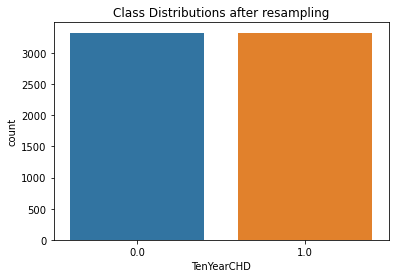

In [23]:
#Viewing class distribution after resampling
df_temp = {'TenYearCHD' : y[:,0]}
df = pd.DataFrame(df_temp)

plt.figure(figsize=(6, 4))
sns.countplot('TenYearCHD', data = df)
plt.title('Class Distributions after resampling')

Now the dataset is balanced

In [24]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5992, 15) (5992, 1) (666, 15) (666, 1)


#**Model Training**

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
y_train = y_train.reshape(len(y_train))
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [26]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       334
         1.0       0.94      0.93      0.94       332

    accuracy                           0.94       666
   macro avg       0.94      0.94      0.94       666
weighted avg       0.94      0.94      0.94       666

